# *Cleaning Raw Data Scraped from PayScale*
--- 


In [300]:
# import libraries
import pandas as pd
import re

In [301]:
# import data from github
raw_data = pd.read_csv('https://raw.githubusercontent.com/szilvasipeter2000/Web_Scraping/main/payscale/data/data_raw.csv')


In [330]:
# create base for cleaning data
clean_data = pd.DataFrame({})
# create a variable for the raw data columns to use later for dropping them
raw_columns = raw_data.columns

In [331]:
raw_data.T

,0,1,2,3,4,5,6,7,8,9,...,2806,2807,2808,2809,2810,2811,2812,2813,2814,2815
industry_url,https://www.payscale.com/research/US/Job/Accou...,https://www.payscale.com/research/US/Job/Accou...,https://www.payscale.com/research/US/Job/Accou...,https://www.payscale.com/research/US/Job/Accou...,https://www.payscale.com/research/US/Job/Accou...,https://www.payscale.com/research/US/Job/Accou...,https://www.payscale.com/research/US/Job/Accou...,https://www.payscale.com/research/US/Job/Accou...,https://www.payscale.com/research/US/Job/Accou...,https://www.payscale.com/research/US/Job/Accou...,...,https://www.payscale.com/research/US/Job/Trans...,https://www.payscale.com/research/US/Job/Trans...,https://www.payscale.com/research/US/Job/Trans...,https://www.payscale.com/research/US/Job/Trans...,https://www.payscale.com/research/US/Job/Trans...,https://www.payscale.com/research/US/Job/Trans...,https://www.payscale.com/research/US/Job/Trans...,https://www.payscale.com/research/US/Job/Trans...,https://www.payscale.com/research/US/Job/Trans...,https://www.payscale.com/research/US/Job/Trans...
job_title_url,https://www.payscale.com/research/US/Job=Staff...,https://www.payscale.com/research/US/Job=Finan...,https://www.payscale.com/research/US/Job=Senio...,https://www.payscale.com/research/US/Job=Accou...,https://www.payscale.com/research/US/Job=Finan...,https://www.payscale.com/research/US/Job=Accou...,https://www.payscale.com/research/US/Job=Senio...,https://www.payscale.com/research/US/Job=Finan...,https://www.payscale.com/research/US/Job=Corpo...,https://www.payscale.com/research/US/Job=Finan...,...,https://www.payscale.com/research/US/Job=Shipp...,https://www.payscale.com/research/US/Job=Railr...,https://www.payscale.com/research/US/Job=Van_T...,https://www.payscale.com/research/US/Job=Airli...,https://www.payscale.com/research/US/Job=Wareh...,https://www.payscale.com/research/US/Job=Logis...,https://www.payscale.com/research/US/Job=Packe...,https://www.payscale.com/research/US/Job=Concr...,https://www.payscale.com/research/US/Job=Fleet...,https://www.payscale.com/research/US/Job=Drive...
job_title,Average Staff Accountant Salary,Average Financial Analyst Salary,Average Senior Accountant Salary,Average Accountant Salary,Average Financial Controller Salary,Average Accounting Manager Salary,Average Senior Financial Analyst Salary,Average Finance Manager Salary,Average Corporate Controller Salary,Average Finance Director Salary,...,Average Shipping Packer Hourly Pay,Average Railroad Conductor Salary,Average Van Truck Driver Hourly Pay,Average Airline Captain Salary,Average Warehouse Assistant Hourly Pay,Average Logistics Management Specialist Salary,"Average Packer / Packager, Hand Hourly Pay",Average Concrete Pump Operator Hourly Pay,Average Fleet Supervisor Salary,Average Driver/Sales Worker Hourly Pay
wage,"$56,160","$66,222","$73,492","$56,610","$91,776","$80,849","$86,790","$99,781","$111,643","$119,547",...,$15.44,"$74,889",$21.66,"$208,305",$16.15,"$73,905",$15.16,$26.04,"$64,924",$16.28
wage_base,/ year,/ year,/ year,/ year,/ year,/ year,/ year,/ year,/ year,/ year,...,/ hour,/ year,/ hour,/ year,/ hour,/ year,/ hour,/ hour,/ year,/ hour
experience_level,"['Entry Level', 'Early Career', 'Mid Career', ...","['Entry Level', 'Early Career', 'Mid Career', ...","['Entry Level', 'Early Career', 'Mid Career', ...","['Entry Level', 'Early Career', 'Mid Career', ...","['Entry Level', 'Early Career', 'Mid Career', ...","['Entry Level', 'Early Career', 'Mid Career', ...","['Entry Level', 'Early Career', 'Mid Career', ...","['Entry Level', 'Early Career', 'Mid Career', ...","['Entry Level', 'Early Career', 'Mid Career', ...","['Entry Level', 'Early Career', 'Mid Career', ...",...,"['Entry Level', 'Early Career', 'Mid Career', ...","['Entry Level', 'Early Career', 'Mid Career', ...","['Entry Level', 'Early Career', 'Mid Career', ...","['Early Career', 'Mid Career', 'Late Career', ...","['Entry Level', 'Early Career', 'Mid Career', ...","['Entry Level

In [332]:
# Clean Industry
def clean_industry(link):
    match = re.search(r'/Job/([^/]+)', link)
    return match.group(1) if match else None

# apply function to industry_url column to create industry column
clean_data['industry'] = raw_data['industry_url'].apply(clean_industry)

# show the result
clean_data

,industry
0,Accounting-and-Finance
1,Accounting-and-Finance
2,Accounting-and-Finance
3,Accounting-and-Finance
4,Accounting-and-Finance
...,...
2811,Transportation
2812,Transportation
2813,Transportation
2814,Transportation


In [333]:
# Clean Job Title
def clean_job_title(link):
    match = re.search(r'/Job=([^/]+)', link)
    return match.group(1) if match else None

# apply function to industry_url column to create industry column
clean_data['job_title'] = raw_data['job_title_url'].apply(clean_job_title)

# show the result
clean_data

,industry,job_title
0,Accounting-and-Finance,Staff_Accountant
1,Accounting-and-Finance,Financial_Analyst
2,Accounting-and-Finance,Senior_Accountant
3,Accounting-and-Finance,Accountant
4,Accounting-and-Finance,Financial_Controller
...,...,...
2811,Transportation,Logistics_Management_Specialist
2812,Transportation,Packer_%2F_Packager%2C_Hand
2813,Transportation,Concrete_Pump_Operator
2814,Transportation,Fleet_Supervisor


In [334]:
# Clean Average Wage
def clean_avg_wage(wage):
    return float(re.sub('[\$,]', '', wage))

# apply function to wage column to create avg_wage column
clean_data['avg_wage'] = raw_data['wage'].apply(clean_avg_wage)

# show the result
clean_data

,industry,job_title,avg_wage
0,Accounting-and-Finance,Staff_Accountant,56160.00
1,Accounting-and-Finance,Financial_Analyst,66222.00
2,Accounting-and-Finance,Senior_Accountant,73492.00
3,Accounting-and-Finance,Accountant,56610.00
4,Accounting-and-Finance,Financial_Controller,91776.00
...,...,...,...
2811,Transportation,Logistics_Management_Specialist,73905.00
2812,Transportation,Packer_%2F_Packager%2C_Hand,15.16
2813,Transportation,Concrete_Pump_Operator,26.04
2814,Transportation,Fleet_Supervisor,64924.00


In [335]:
# Clean Average Wage Base
def clean_avg_wage_base(wage_base):
    return wage_base[-4:]
# apply function to wage_base column to create avg_wage_base column
clean_data['avg_wage_base'] = raw_data['wage_base'].apply(clean_avg_wage_base)

# show the result
clean_data

,industry,job_title,avg_wage,avg_wage_base
0,Accounting-and-Finance,Staff_Accountant,56160.00,year
1,Accounting-and-Finance,Financial_Analyst,66222.00,year
2,Accounting-and-Finance,Senior_Accountant,73492.00,year
3,Accounting-and-Finance,Accountant,56610.00,year
4,Accounting-and-Finance,Financial_Controller,91776.00,year
...,...,...,...,...
2811,Transportation,Logistics_Management_Specialist,73905.00,year
2812,Transportation,Packer_%2F_Packager%2C_Hand,15.16,hour
2813,Transportation,Concrete_Pump_Operator,26.04,hour
2814,Transportation,Fleet_Supervisor,64924.00,year


In [336]:
# Clean percentage change: create actual list from 'fake' list
def clean_percentage_change(percentage_change):
    my_list = percentage_change.replace('[', '').replace(']', '').replace("'",'').replace('%','').replace('▼', '-').replace('▲', '+').split(', ')
    original_list = [f'(100{element})/100' for element in my_list]
    result_list = [eval(expression) for expression in original_list]
    return result_list
# apply function to percentage_change column to create percentage_change column
clean_data['percentage_change'] = raw_data['percentage_change'].apply(clean_percentage_change)

# show the result
clean_data

,industry,job_title,avg_wage,avg_wage_base,percentage_change
0,Accounting-and-Finance,Staff_Accountant,56160.00,year,"[0.92, 0.99, 1.05, 1.05, 1.06]"
1,Accounting-and-Finance,Financial_Analyst,66222.00,year,"[0.9, 0.99, 1.11, 1.17, 1.21]"
2,Accounting-and-Finance,Senior_Accountant,73492.00,year,"[0.88, 0.96, 1.02, 1.04, 1.02]"
3,Accounting-and-Finance,Accountant,56610.00,year,"[0.9, 0.94, 1.07, 1.09, 1.13]"
4,Accounting-and-Finance,Financial_Controller,91776.00,year,"[0.73, 0.85, 0.98, 1.06, 1.05]"
...,...,...,...,...,...
2811,Transportation,Logistics_Management_Specialist,73905.00,year,"[0.69, 0.78, 0.89, 1.03, 1.17]"
2812,Transportation,Packer_%2F_Packager%2C_Hand,15.16,hour,"[0.84, 0.99, 0.97, 0.96, 1.1]"
2813,Transportation,Concrete_Pump_Operator,26.04,hour,"[0.74, 0.9, 0.99, 1.0, 1.12]"
2814,Transportation,Fleet_Supervisor,64924.00,year,"[0.95, 1.01, 0.97, 1.15]"


In [337]:
# Clean Experience Level: create actual list from 'fake' list
def clean_experience_level(experience_level):
    my_list = experience_level.replace('[', '').replace(']', '').replace("'",'').split(', ')
    return my_list
# apply function to experience_level column to create experience_level column
clean_data['experience_level'] = raw_data['experience_level'].apply(clean_experience_level)

# show the result
clean_data

,industry,job_title,avg_wage,avg_wage_base,percentage_change,experience_level
0,Accounting-and-Finance,Staff_Accountant,56160.00,year,"[0.92, 0.99, 1.05, 1.05, 1.06]","[Entry Level, Early Career, Mid Career, Late C..."
1,Accounting-and-Finance,Financial_Analyst,66222.00,year,"[0.9, 0.99, 1.11, 1.17, 1.21]","[Entry Level, Early Career, Mid Career, Late C..."
2,Accounting-and-Finance,Senior_Accountant,73492.00,year,"[0.88, 0.96, 1.02, 1.04, 1.02]","[Entry Level, Early Career, Mid Career, Late C..."
3,Accounting-and-Finance,Accountant,56610.00,year,"[0.9, 0.94, 1.07, 1.09, 1.13]","[Entry Level, Early Career, Mid Career, Late C..."
4,Accounting-and-Finance,Financial_Controller,91776.00,year,"[0.73, 0.85, 0.98, 1.06, 1.05]","[Entry Level, Early Career, Mid Career, Late C..."
...,...,...,...,...,...,...
2811,Transportation,Logistics_Management_Specialist,73905.00,year,"[0.69, 0.78, 0.89, 1.03, 1.17]","[Entry Level, Early Career, Mid Career, Late C..."
2812,Transportation,Packer_%2F_Packager%2C_Hand,15.16,hour,"[0.84, 0.99, 0.97, 0.96, 1.1]","[Entry Level, Early Career, Mid Career, Late C..."
2813,Transportation,Concrete_Pump_Operator,26.04,hour,"[0.74, 0.9, 0.99, 1.0, 1.12]","[Entry Level, Early Career, Mid Career, Late C..."
2814,Transportation,Fleet_Supervisor,64924.00,year,"[0.95, 1.01, 0.97, 1.15]","[Early Career, Mid Career, Late Career, Experi..."


In [338]:
# Now we can map the exp level and the percentage change together
# Create a DataFrame from exp_level and percentage_change. we can concat it to clean_data later
exp_dict = [dict(zip(x, y)) for x, y in zip(clean_data['experience_level'], clean_data['percentage_change'])]
exp_dict = pd.DataFrame(exp_dict)
exp_dict

,Entry Level,Early Career,Mid Career,Late Career,Experienced,
0,0.92,0.99,1.05,1.05,1.06,NaN
1,0.90,0.99,1.11,1.17,1.21,NaN
2,0.88,0.96,1.02,1.04,1.02,NaN
3,0.90,0.94,1.07,1.09,1.13,NaN
4,0.73,0.85,0.98,1.06,1.05,NaN
...,...,...,...,...,...,...
2811,0.69,0.78,0.89,1.03,1.17,NaN
2812,0.84,0.99,0.97,0.96,1.10,NaN
2813,0.74,0.90,0.99,1.00,1.12,NaN
2814,NaN,0.95,1.01,0.97,1.15,NaN


In [339]:
# concat the two dataframes
clean_data = clean_data.merge(exp_dict, left_index=True,right_index=True)
# drop the unnecessary columns
clean_data.drop(['percentage_change', 'experience_level',''], axis=1,inplace=True)

# show the result
clean_data

,industry,job_title,avg_wage,avg_wage_base,Entry Level,Early Career,Mid Career,Late Career,Experienced
0,Accounting-and-Finance,Staff_Accountant,56160.00,year,0.92,0.99,1.05,1.05,1.06
1,Accounting-and-Finance,Financial_Analyst,66222.00,year,0.90,0.99,1.11,1.17,1.21
2,Accounting-and-Finance,Senior_Accountant,73492.00,year,0.88,0.96,1.02,1.04,1.02
3,Accounting-and-Finance,Accountant,56610.00,year,0.90,0.94,1.07,1.09,1.13
4,Accounting-and-Finance,Financial_Controller,91776.00,year,0.73,0.85,0.98,1.06,1.05
...,...,...,...,...,...,...,...,...,...
2811,Transportation,Logistics_Management_Specialist,73905.00,year,0.69,0.78,0.89,1.03,1.17
2812,Transportation,Packer_%2F_Packager%2C_Hand,15.16,hour,0.84,0.99,0.97,0.96,1.10
2813,Transportation,Concrete_Pump_Operator,26.04,hour,0.74,0.90,0.99,1.00,1.12
2814,Transportation,Fleet_Supervisor,64924.00,year,NaN,0.95,1.01,0.97,1.15


In [340]:
# multiply the percentage change with the average wage to get the actual wage
clean_data['entry_level'] = clean_data['Entry Level']*clean_data['avg_wage']
clean_data['early_career'] = clean_data['Early Career']*clean_data['avg_wage']
clean_data['mid_career'] = clean_data['Mid Career']*clean_data['avg_wage']
clean_data['late_career'] = clean_data['Late Career']*clean_data['avg_wage']
clean_data['experienced'] = clean_data['Experienced']*clean_data['avg_wage']

#show the result
clean_data

,industry,job_title,avg_wage,avg_wage_base,Entry Level,Early Career,Mid Career,Late Career,Experienced,entry_level,early_career,mid_career,late_career,experienced
0,Accounting-and-Finance,Staff_Accountant,56160.00,year,0.92,0.99,1.05,1.05,1.06,51667.2000,55598.4000,58968.0000,58968.0000,59529.6000
1,Accounting-and-Finance,Financial_Analyst,66222.00,year,0.90,0.99,1.11,1.17,1.21,59599.8000,65559.7800,73506.4200,77479.7400,80128.6200
2,Accounting-and-Finance,Senior_Accountant,73492.00,year,0.88,0.96,1.02,1.04,1.02,64672.9600,70552.3200,74961.8400,76431.6800,74961.8400
3,Accounting-and-Finance,Accountant,56610.00,year,0.90,0.94,1.07,1.09,1.13,50949.0000,53213.4000,60572.7000,61704.9000,63969.3000
4,Accounting-and-Finance,Financial_Controller,91776.00,year,0.73,0.85,0.98,1.06,1.05,66996.4800,78009.6000,89940.4800,97282.5600,96364.8000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2811,Transportation,Logistics_Management_Specialist,73905.00,year,0.69,0.78,0.89,1.03,1.17,50994.4500,57645.9000,65775.4500,76122.1500,86468.8500
2812,Transportation,Packer_%2F_Packager%2C_Hand,15.16,hour,0.84,0.99,0.97,0.96,1.10,12.7344,15.0084,14.7052,14.5536,16.6760
2813,Transportation,Concrete_Pump_Operator,26.04,hour,0.74,0.90,0.99,1.00,1.12,19.2696,23.4360,25.7796,26.0400,29.1648
2814,Transportation,Fleet_Supervisor,64924.00,year,NaN,0.95,1.01,0.97,1.15,NaN,61677.8000,65573.2400,62976.2800,74662.6000


In [341]:
# drop the unnecessary columns
clean_data.drop(['Entry Level', 'Early Career', 'Mid Career', 'Late Career', 'Experienced'], axis=1,inplace=True)

#show the result
clean_data

,industry,job_title,avg_wage,avg_wage_base,entry_level,early_career,mid_career,late_career,experienced
0,Accounting-and-Finance,Staff_Accountant,56160.00,year,51667.2000,55598.4000,58968.0000,58968.0000,59529.6000
1,Accounting-and-Finance,Financial_Analyst,66222.00,year,59599.8000,65559.7800,73506.4200,77479.7400,80128.6200
2,Accounting-and-Finance,Senior_Accountant,73492.00,year,64672.9600,70552.3200,74961.8400,76431.6800,74961.8400
3,Accounting-and-Finance,Accountant,56610.00,year,50949.0000,53213.4000,60572.7000,61704.9000,63969.3000
4,Accounting-and-Finance,Financial_Controller,91776.00,year,66996.4800,78009.6000,89940.4800,97282.5600,96364.8000
...,...,...,...,...,...,...,...,...,...
2811,Transportation,Logistics_Management_Specialist,73905.00,year,50994.4500,57645.9000,65775.4500,76122.1500,86468.8500
2812,Transportation,Packer_%2F_Packager%2C_Hand,15.16,hour,12.7344,15.0084,14.7052,14.5536,16.6760
2813,Transportation,Concrete_Pump_Operator,26.04,hour,19.2696,23.4360,25.7796,26.0400,29.1648
2814,Transportation,Fleet_Supervisor,64924.00,year,NaN,61677.8000,65573.2400,62976.2800,74662.6000


In [364]:
# we can make a long formatted table using the df.melt
test_data = clean_data.melt(id_vars=['industry', 'job_title', 'avg_wage', 'avg_wage_base'], var_name='experience_level', value_name='wage')

In [365]:
test_data

,industry,job_title,avg_wage,avg_wage_base,experience_level,wage
0,Accounting-and-Finance,Staff_Accountant,56160.00,year,entry_level,51667.2000
1,Accounting-and-Finance,Financial_Analyst,66222.00,year,entry_level,59599.8000
2,Accounting-and-Finance,Senior_Accountant,73492.00,year,entry_level,64672.9600
3,Accounting-and-Finance,Accountant,56610.00,year,entry_level,50949.0000
4,Accounting-and-Finance,Financial_Controller,91776.00,year,entry_level,66996.4800
...,...,...,...,...,...,...
14075,Transportation,Logistics_Management_Specialist,73905.00,year,experienced,86468.8500
14076,Transportation,Packer_%2F_Packager%2C_Hand,15.16,hour,experienced,16.6760
14077,Transportation,Concrete_Pump_Operator,26.04,hour,experienced,29.1648
14078,Transportation,Fleet_Supervisor,64924.00,year,experienced,74662.6000


In [366]:
test_data = test_data.query('job_title == "Concrete_Pump_Operator"')
test_data

,industry,job_title,avg_wage,avg_wage_base,experience_level,wage
2813,Transportation,Concrete_Pump_Operator,26.04,hour,entry_level,19.2696
5629,Transportation,Concrete_Pump_Operator,26.04,hour,early_career,23.4360
8445,Transportation,Concrete_Pump_Operator,26.04,hour,mid_career,25.7796
11261,Transportation,Concrete_Pump_Operator,26.04,hour,late_career,26.0400
14077,Transportation,Concrete_Pump_Operator,26.04,hour,experienced,29.1648


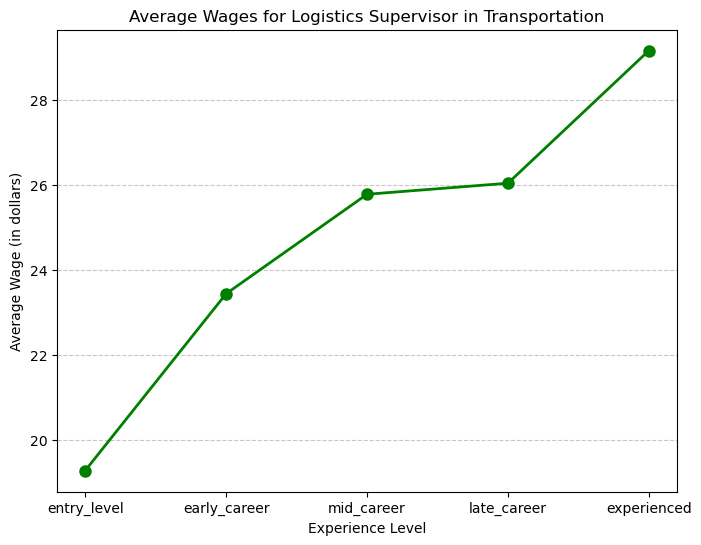

In [367]:
import pandas as pd
import matplotlib.pyplot as plt

test_data = test_data.query('job_title == "Concrete_Pump_Operator"')

plt.figure(figsize=(8, 6))
plt.plot(test_data['experience_level'], test_data['wage'], marker='o', color='green', linestyle='-', linewidth=2, markersize=8)

# Adding labels and title
plt.title(f'Average Wages for Logistics Supervisor in Transportation')
plt.xlabel('Experience Level')
plt.ylabel('Average Wage (in dollars)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot


plt.show()
